In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
df_contaminantes = pd.read_csv('datos/contaminates_por_mes.csv')

In [39]:
df_contaminantes.head()

,fecha,arsenico,benpirenos,cadmio,niquel
0,2008-01-31,1.445264,0.281087,0.768682,6.056367
1,2008-02-29,1.270137,0.215056,0.751601,5.974355
2,2008-03-31,1.093210,0.120814,0.556587,4.933656
3,2008-04-30,1.265506,0.073814,0.658350,4.354272
4,2008-05-31,1.218206,0.063008,0.852267,5.091518


In [6]:
df_contaminantes['fecha'] = pd.to_datetime(df_contaminantes['fecha'])

In [7]:
df_contaminantes.dtypes

fecha         datetime64[ns]
arsenico             float64
benpirenos           float64
cadmio               float64
niquel               float64
dtype: object

In [8]:
df_contaminantes = df_contaminantes.set_index('fecha')

In [9]:
df_contaminantes.head()

,arsenico,benpirenos,cadmio,niquel
fecha,,,,
2008-01-31,1.445264,0.281087,0.768682,6.056367
2008-02-29,1.270137,0.215056,0.751601,5.974355
2008-03-31,1.093210,0.120814,0.556587,4.933656
2008-04-30,1.265506,0.073814,0.658350,4.354272
2008-05-31,1.218206,0.063008,0.852267,5.091518


<h3>Análisis exploratorio</h3>

En este notebook se realiza un breve análisis exploratorio, en el que como explica la memoria, apenas existe correlación
entre los distintos contaminantes, entre ellos y con la tasa de paro, a excepción de las partículas PM10 que 
son aquellas que por su importancia nos enfocaremos en su estudio.<br>

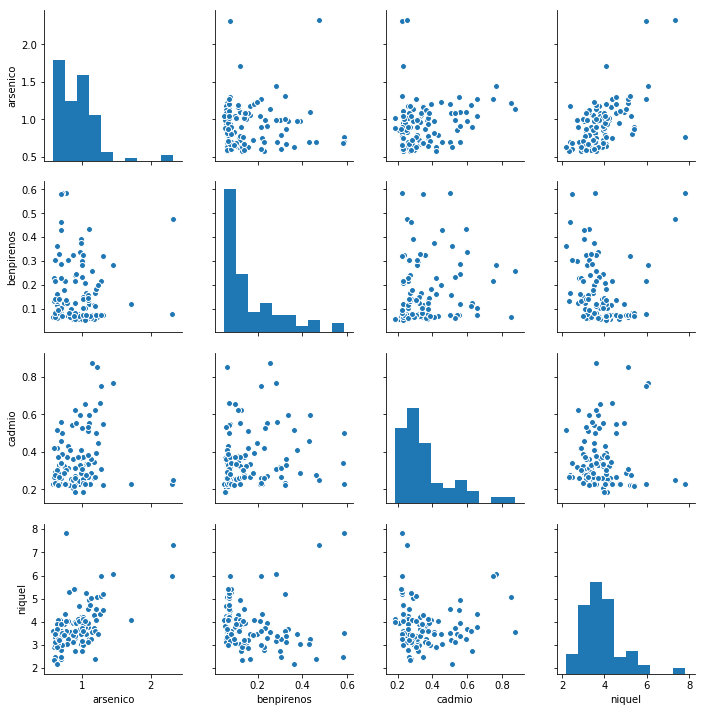

In [10]:
sns.pairplot(df_contaminantes)

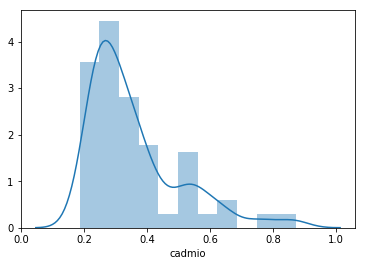

In [11]:
sns.distplot(df_contaminantes['cadmio'])

In [12]:
df_contaminantes.corr()

,arsenico,benpirenos,cadmio,niquel
arsenico,1.000000,0.004295,0.190502,0.568442
benpirenos,0.004295,1.000000,0.152375,-0.045154
cadmio,0.190502,0.152375,1.000000,0.009386
niquel,0.568442,-0.045154,0.009386,1.000000


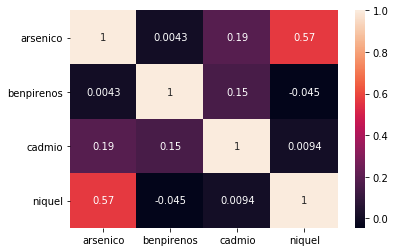

In [13]:
sns.heatmap(df_contaminantes.corr(), annot=True)

In [14]:
tasa_paro = pd.read_csv('datos/tasa_paro_2002_2016.csv', decimal=',')

In [15]:
tasa_paro.dtypes

Year          object
Tasa paro    float64
dtype: object

In [16]:
tasa_paro['Year'] = pd.to_datetime(tasa_paro['Year'])

In [17]:
tasa_paro.head()


,Year,Tasa paro
0,2002-03-30,11.55
1,2002-06-30,11.15
2,2002-09-30,11.49
3,2002-12-30,11.61
4,2003-03-30,11.99


In [18]:
len(df_contaminantes)

108

In [19]:
len(tasa_paro)

60

In [20]:
tasa_paro2=tasa_paro.iloc[24:,:]

In [21]:
len(tasa_paro2)

36

In [22]:
df_contaminantes_paro = pd.read_csv("datos/contaminates_trimestral.csv")

In [23]:
tasa_paro2 = tasa_paro2.reset_index()

In [24]:
tasa_paro2

,index,Year,Tasa paro
0,24,2008-03-30,9.60
1,25,2008-06-30,10.36
2,26,2008-09-30,11.23
3,27,2008-12-30,13.79
4,28,2009-03-30,17.24
5,29,2009-06-30,17.77
6,30,2009-09-30,17.75
7,31,2009-12-30,18.66
8,32,2010-03-30,19.84
9,33,2010-06-30,19.89


In [25]:
df_contaminantes_paro['tasa paro'] = tasa_paro2['Tasa paro']

In [26]:
df_contaminantes_paro

,fecha,arsenico,benpirenos,cadmio,niquel,tasa paro
0,2008-03-31,1.093210,0.120814,0.556587,4.933656,9.60
1,2008-06-30,1.302040,0.074592,0.551104,4.529125,10.36
2,2008-09-30,0.987349,0.067435,0.327472,4.204725,11.23
3,2008-12-31,0.978699,0.390187,0.288800,3.022981,13.79
4,2009-03-31,1.178371,0.116840,0.347869,3.725914,17.24
5,2009-06-30,1.014719,0.057456,0.185769,4.102456,17.77
6,2009-09-30,1.086027,0.063088,0.333221,3.797754,17.75
7,2009-12-31,1.008233,0.147116,0.323016,2.987085,18.66
8,2010-03-31,1.086381,0.157722,0.509211,3.236846,19.84
9,2010-06-30,0.970266,0.067540,0.330963,3.694290,19.89


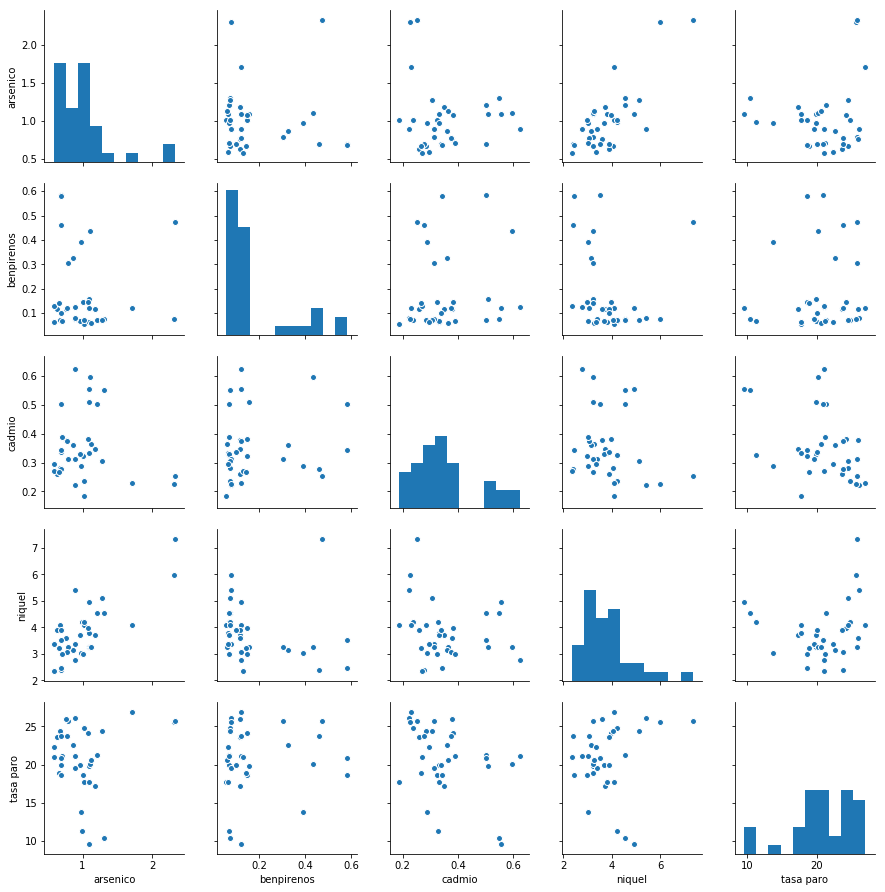

In [27]:
sns.pairplot(df_contaminantes_paro)

In [28]:
df_contaminantes_paro.corr()

,arsenico,benpirenos,cadmio,niquel,tasa paro
arsenico,1.000000,-0.010544,-0.093597,0.754222,0.123093
benpirenos,-0.010544,1.000000,0.140764,-0.161219,0.052351
cadmio,-0.093597,0.140764,1.000000,-0.188122,-0.397898
niquel,0.754222,-0.161219,-0.188122,1.000000,0.139531
tasa paro,0.123093,0.052351,-0.397898,0.139531,1.000000


<h2> ESTUDIO PARA PARTÍCULAS 10 micras </h2>

In [29]:
pm10csv = pd.read_csv('datos/pm10.csv')

In [31]:
pm10csv.columns


Index(['Unnamed: 0', 'y2001', 'y2002', 'y2003', 'y2004', 'y2005', 'y2006',
       'y2007', 'y2008', 'y2009', 'y2010', 'y2011', 'y2012', 'y2013', 'y2014',
       'y2015', 'y2016'],
      dtype='object')

In [32]:
pm10csv = pm10csv.iloc[:,1:]

In [33]:
pm10csv

,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016
0,47.293600,36.878094,24.812479,22.208213,27.465788,26.103168,36.270203,32.937238,18.927775,17.405147,25.596995,23.290370,18.221588,17.171058,20.498432,20.215709
1,55.128328,37.373950,25.993710,35.577635,29.242306,36.802329,29.698028,34.648043,25.483145,17.633227,26.295154,25.647738,17.103671,15.746431,18.960200,22.846952
2,32.606092,35.112357,38.067317,34.543537,40.497777,30.786894,29.645428,23.341674,28.733972,27.876883,21.305298,27.947710,16.154088,23.448508,21.428050,16.490487
3,28.833526,34.246774,29.736321,21.621801,32.012189,31.027896,30.702033,24.673716,19.232946,21.625204,24.652417,15.694662,18.254282,17.973531,20.854529,14.965678
4,31.295070,29.014845,30.096026,26.338370,34.735496,36.667626,30.537968,23.252266,28.558337,18.860221,20.999829,20.008141,16.831030,16.643651,21.844693,16.677103
5,32.786156,35.952304,39.753812,31.735655,38.475431,42.832881,27.853268,23.137711,25.661903,19.830960,19.593463,25.043164,20.632805,20.222209,20.558683,19.827451
6,30.895709,34.648614,33.494597,35.769257,35.124545,36.123316,31.530919,25.680810,25.631606,24.248480,21.316974,22.512195,23.621117,18.617661,25.231784,22.514125
7,31.055727,27.835951,33.645129,26.395983,29.128529,25.221841,29.695401,23.163241,23.567161,21.536846,23.102519,25.770377,21.252798,18.686920,20.670335,21.615365
8,29.503108,29.498977,27.977213,33.642223,29.504051,28.287671,29.153729,24.710823,22.742673,20.094987,21.991548,21.197685,20.630053,20.689025,17.744804,19.828938
9,31.723759,29.704568,21.944123,28.332649,26.643167,32.302350,26.472275,31.154252,23.445264,21.018377,24.441703,19.592631,20.032676,24.765134,19.242708,22.152234


In [34]:
serie_pm10 = pd.read_csv('datos/seriePm10.csv', header=None)

In [36]:
serie_pm10 = serie_pm10.iloc[14:,1:]

In [37]:
serie_pm10

,1
14,35.112357
15,34.246774
16,29.014845
17,35.952304
18,34.648614
19,27.835951
20,29.498977
21,29.704568
22,27.085234
23,26.863580


In [38]:
len(serie_pm10)

178

In [39]:
rng = pd.date_range('30/03/2002', periods=178, freq='M')

In [40]:
rng

DatetimeIndex(['2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30',
               '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31',
               '2002-11-30', '2002-12-31',
               ...
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', length=178, freq='M')

In [41]:
serie_pm10['Fecha'] = rng

In [96]:
serie_pm10

,1,Fecha
14,35.112357,2002-03-31
15,34.246774,2002-04-30
16,29.014845,2002-05-31
17,35.952304,2002-06-30
18,34.648614,2002-07-31
19,27.835951,2002-08-31
20,29.498977,2002-09-30
21,29.704568,2002-10-31
22,27.085234,2002-11-30
23,26.863580,2002-12-31


In [97]:
serie_pm10.to_csv('datos/particulas10_tasa_paro.csv')

In [79]:
len(tasa_paro)

60

In [42]:
particulas_tasa = pd.read_csv('datos/particulas10_tasa_paro.csv')

In [43]:
particulas_tasa

,Unnamed: 0,1,Fecha
0,14,35.112357,2002-03-31
1,15,34.246774,2002-04-30
2,16,29.014845,2002-05-31
3,17,35.952304,2002-06-30
4,18,34.648614,2002-07-31
5,19,27.835951,2002-08-31
6,20,29.498977,2002-09-30
7,21,29.704568,2002-10-31
8,22,27.085234,2002-11-30
9,23,26.863580,2002-12-31


In [44]:
particulas_tasa['Fecha2'] = pd.to_datetime(particulas_tasa['Fecha'])

In [45]:
particulas_tasa.dtypes

Unnamed: 0             int64
1                    float64
Fecha                 object
Fecha2        datetime64[ns]
dtype: object

In [46]:
particulas_tasa

,Unnamed: 0,1,Fecha,Fecha2
0,14,35.112357,2002-03-31,2002-03-31
1,15,34.246774,2002-04-30,2002-04-30
2,16,29.014845,2002-05-31,2002-05-31
3,17,35.952304,2002-06-30,2002-06-30
4,18,34.648614,2002-07-31,2002-07-31
5,19,27.835951,2002-08-31,2002-08-31
6,20,29.498977,2002-09-30,2002-09-30
7,21,29.704568,2002-10-31,2002-10-31
8,22,27.085234,2002-11-30,2002-11-30
9,23,26.863580,2002-12-31,2002-12-31


In [47]:
particulas_tasa = particulas_tasa.drop(['Fecha'], axis=1)

In [48]:
particulas_tasa = particulas_tasa.drop(['Unnamed: 0'], axis=1)

In [49]:
particulas_tasa.columns = ['contaminante', 'fecha']

In [50]:
particulas_tasa['Tasa paro'] = tasa_paro['Tasa paro']

In [51]:
particulas_tasa

,contaminante,fecha,Tasa paro
0,35.112357,2002-03-31,11.55
1,34.246774,2002-04-30,11.15
2,29.014845,2002-05-31,11.49
3,35.952304,2002-06-30,11.61
4,34.648614,2002-07-31,11.99
5,27.835951,2002-08-31,11.28
6,29.498977,2002-09-30,11.30
7,29.704568,2002-10-31,11.37
8,27.085234,2002-11-30,11.50
9,26.863580,2002-12-31,11.09


In [89]:
particulas_tasa  = particulas_tasa.set_index('fecha')

In [90]:
particulas_tasa

,contaminante,Tasa paro
fecha,,
2002-03-31,35.112357,11.55
2002-06-30,35.952304,11.15
2002-09-30,29.498977,11.49
2002-12-31,26.863580,11.61
2003-03-31,38.067317,11.99
2003-06-30,39.753812,11.28
2003-09-30,27.977213,11.30
2003-12-31,22.810386,11.37
2004-03-31,34.543537,11.50


In [91]:
particulas_tasa.corr()

,contaminante,Tasa paro
contaminante,1.000000,-0.637372
Tasa paro,-0.637372,1.000000


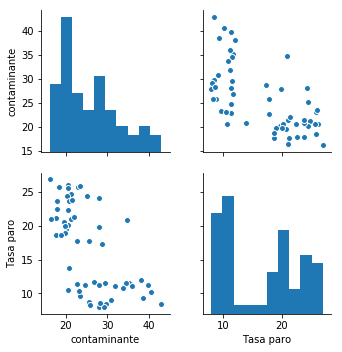

In [92]:
sns.pairplot(particulas_tasa)

In [93]:
# particulas_tasa.to_csv('particulas_pm10_tasa.csv')

======================= PARTICULAS 2.5  .csv  ========================

In [19]:
pm25 = pd.read_csv('25pm.csv', header=None)

In [20]:
pm25 = pm25.drop([0], axis=1)

In [21]:
len(pm25)

96

In [22]:
paro_pm25 = tasa_paro.iloc[27:,:]

In [23]:
len(paro_pm25)

33

In [24]:
paro_pm25

,Year,Tasa paro
27,2008-12-30,13.79
28,2009-03-30,17.24
29,2009-06-30,17.77
30,2009-09-30,17.75
31,2009-12-30,18.66
32,2010-03-30,19.84
33,2010-06-30,19.89
34,2010-09-30,19.59
35,2010-12-30,20.11
36,2011-03-30,21.08


In [25]:
rango = pd.date_range('30/01/2009', periods=96, freq='M')

In [26]:
pm25['Fecha'] = rango

In [27]:
pm25

,1,Fecha
0,10.019166,2009-01-31
1,13.413926,2009-02-28
2,14.339257,2009-03-31
3,10.276743,2009-04-30
4,12.550319,2009-05-31
5,12.473253,2009-06-30
6,11.695893,2009-07-31
7,11.854021,2009-08-31
8,12.077693,2009-09-30
9,11.333856,2009-10-31


In [201]:
# pm25.to_csv('datos/paro_pm25_trimestral.csv')

In [28]:
pm25_tasa_paro = pd.read_csv('datos/paro_pm25_trimestral.csv')

In [29]:
pm25_tasa_paro = pm25_tasa_paro.drop(['Unnamed: 0'], axis=1)

In [30]:
pm25_tasa_paro.columns = ['contaminante', 'Fecha']

In [31]:
pm25_tasa_paro

,contaminante,Fecha
0,14.339257,2009-03-31
1,12.473253,2009-06-30
2,12.077693,2009-09-30
3,9.490390,2009-12-31
4,15.788309,2010-03-31
5,10.672609,2010-06-30
6,10.231391,2010-09-30
7,12.724314,2010-12-31
8,12.876882,2011-03-31
9,11.561033,2011-06-30


In [32]:
tasa_paro

,Year,Tasa paro
0,2002-03-30,11.55
1,2002-06-30,11.15
2,2002-09-30,11.49
3,2002-12-30,11.61
4,2003-03-30,11.99
5,2003-06-30,11.28
6,2003-09-30,11.30
7,2003-12-30,11.37
8,2004-03-30,11.50
9,2004-06-30,11.09


In [33]:
pm25_tasa_paro['Tasa paro'] = tasa_paro['Tasa paro']

In [34]:
pm25_tasa_paro['Fecha'] = pd.to_datetime(pm25_tasa_paro['Fecha'])

pm25_tasa_paro.dtypes

In [35]:
pm25_tasa_paro= pm25_tasa_paro.set_index('Fecha')

In [36]:
pm25_tasa_paro

,contaminante,Tasa paro
Fecha,,
2009-03-31,14.339257,11.55
2009-06-30,12.473253,11.15
2009-09-30,12.077693,11.49
2009-12-31,9.490390,11.61
2010-03-31,15.788309,11.99
2010-06-30,10.672609,11.28
2010-09-30,10.231391,11.30
2010-12-31,12.724314,11.37
2011-03-31,12.876882,11.50


In [37]:
pm25_tasa_paro.corr()

,contaminante,Tasa paro
contaminante,1.000000,0.002847
Tasa paro,0.002847,1.000000


In [ ]:
p